# PyTorch

## Импорт библиотек

In [2]:
# Основные библиотеки
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms # по возможности отказаться в пользу v2
from torchvision.transforms import v2


In [3]:
# Вспомогательные библиотеки

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# для загрузки изображений
from PIL import Image 

# для отображения прогресс-бар при работе с циклами
from tqdm import tqdm

In [4]:
# Библиотеки для загрузки данных

import struct
import sys

from array import array
from os import path

In [5]:
# выбор процессора

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Тензор

### Создание Тензора

In [6]:
torch.tensor([2,3]) 

tensor([2, 3])

In [7]:
# тензор двумерного массива с объявлением типа данных
torch.tensor([[2,3], [4,5]], dtype=torch.int32)

tensor([[2, 3],
        [4, 5]], dtype=torch.int32)

In [8]:
# тензор двумерного массива с объявлением типа данных FLOAT (важно, если requires_grad=True)
# requires_grad=True - для этого тензора будут вычисляться градиенты во всех функциях, где он будет участвовать
torch.tensor([[2,3], [4,5]], dtype=torch.float32, requires_grad=True)

tensor([[2., 3.],
        [4., 5.]], requires_grad=True)

In [9]:
# создание и перемещение тензора на графический процессор
torch.tensor([[2,3],[4,5]], device=torch.device('cuda:0'))

tensor([[2, 3],
        [4, 5]], device='cuda:0')


### Основные свойства и методы Тензора

In [10]:
tensor = torch.tensor([[[2,3], [4,5]], [[6,7], [8,9]]], dtype=torch.float32, requires_grad=True)

In [11]:
tensor

tensor([[[2., 3.],
         [4., 5.]],

        [[6., 7.],
         [8., 9.]]], requires_grad=True)

In [12]:
#тип переменных

tensor.dtype

torch.float32

In [13]:
# размер тензора

print(tensor.shape)
print(tensor.size())

torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


In [14]:
# количество осей в тензоре

tensor.ndim

3

In [15]:
# обращение к элементу тензора (это тоже не число, а тензор)

tensor[0,0,0]

tensor(2., grad_fn=<SelectBackward0>)

In [16]:
type(tensor[0,0,0])

torch.Tensor

In [17]:
#получение непосредственно числа (из элемента тензора)

tensor[0,0,0].item()

2.0

In [18]:
type(tensor[0,0,0].item())

float

### Создание Тензоров разного размера

In [19]:
#матрица со всеми нулями заданной размерности

tensor = torch.zeros([2,3,2])
tensor

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [20]:
#матрица со всеми единицами заданной размерности

tensor = torch.ones([2,3,2], dtype=torch.int32)
tensor

tensor([[[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]]], dtype=torch.int32)

In [21]:
#матрица со всеми нулями и размерностью аналогично той матрице, что предана в метод

tensor = torch.zeros_like(tensor)
tensor

tensor([[[0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0]]], dtype=torch.int32)

In [22]:
# матрица размерностью аналогично той, что предана в метод, но заполнена переданным элементом

tensor = torch.full_like(tensor, 7)
tensor

tensor([[[7, 7],
         [7, 7],
         [7, 7]],

        [[7, 7],
         [7, 7],
         [7, 7]]], dtype=torch.int32)

In [23]:
#тензор со значениями заданного диапазона и с указанным шагом

torch.arange(2, 10, 0.5)

tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000, 6.0000,
        6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])

In [24]:
# диагональная матрица

torch.diag(torch.tensor([3,2]))

tensor([[3, 0],
        [0, 2]])

In [25]:
# единичная матрица

torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [26]:
# нижняя треугольная матрица

torch.tril(torch.tensor([[1,2,3],[2,3,4],[3,4,5]]))

tensor([[1, 0, 0],
        [2, 3, 0],
        [3, 4, 5]])

### Изменение размера, создание дополнительных осей

In [27]:
tensor = torch.tensor([1,2,3,4])
tensor

tensor([1, 2, 3, 4])

In [28]:
# Изменение размера тензора

tensor_1 = tensor.view([4,1])
tensor_2 = tensor.reshape([2,2])

print(tensor_1, '\n\n', tensor_2)

tensor([[1],
        [2],
        [3],
        [4]]) 

 tensor([[1, 2],
        [3, 4]])


In [29]:
# Добавление осей

print(tensor, tensor.shape) # до добавления оси

tensor = torch.unsqueeze(tensor, 0) # добавление оси

print(tensor, tensor.shape) # после добавления оси

tensor([1, 2, 3, 4]) torch.Size([4])
tensor([[1, 2, 3, 4]]) torch.Size([1, 4])


### Арифметические операции и мат. функции

In [30]:
# Арифметические операции

tensor = torch.tensor([1,2,3,4,5])

tensor_prod = tensor * 5
tensor_sum = tensor + torch.tensor([1,2,3,4,5])

#!!!! ТАК ДЕЛАТЬ НЕЛЬЗЯ - ТЕНЗОР СО СПИСКОМ НЕ СКЛАДЫВАЮТ. !!!!#
#          tensor_sum = tensor + [1,2,3,4,5]

print(tensor_prod, tensor_sum, sep='\n\n')

tensor([ 5, 10, 15, 20, 25])

tensor([ 2,  4,  6,  8, 10])


In [31]:
# Математические функции

tensor = torch.tensor([1,2,3,4,5,6], dtype = torch.float32)

print('Sum: ', tensor.sum())
print('Mean: ', tensor.mean())

Sum:  tensor(21.)
Mean:  tensor(3.5000)


In [32]:
# Математические функции по осям тензора

tensor = torch.tensor([1,2,3,4,5,6], dtype = torch.float32)
tensor = tensor.view([2,3]) #изменим размерность тензора, чтобы было видно, что измерение происходит по осям

tensor_mean = tensor.mean(dim=1,
                          #keepdim=True
                         )

#keepdim=True - ось, по котрой считается среднее значение НЕ УДАЛЯЕТСЯ
tensor_mean_keepdim = tensor.mean(dim=1,
                          keepdim=True
                         )

print('Transformed Tensor: \n', f'\033[94m{tensor}\033[0m', '\n')
print('Tensor with means by axes:', f'\033[94m{tensor_mean}\033[0m', '\n')
print('Shape of tensor with means by axes: ', f'\033[94m{tensor_mean.shape}\033[0m', '\n')
print('\033[91mWith keepdim:\033[0m')
print('Tensor with means by axes:\n', f'\033[94m{tensor_mean_keepdim}\033[0m', '\n')
print('Shape of tensor with means by axes: ', f'\033[94m{tensor_mean_keepdim.shape}\033[0m', '\n')

Transformed Tensor: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

Tensor with means by axes: tensor([2., 5.]) 

Shape of tensor with means by axes:  torch.Size([2]) 

With keepdim:
Tensor with means by axes:
 tensor([[2.],
        [5.]]) 

Shape of tensor with means by axes:  torch.Size([2, 1]) 



### Перевод Тензора на GPU или CPU

In [33]:
#доступность центрального процессора
print(torch.cpu.is_available())

#доступность графического процессора
print(torch.cuda.is_available())

True
True


##### По умолчанию все тензоры создаются на CPU

In [34]:
tensor = torch.tensor([1.,2.,3.], requires_grad=True) 
# requires_grad=True - PyTorch запоминает всё, что с происходит с тензором, чтобы потом автоматически рассчитать производные (градиенты)

In [35]:
#Способы перевести тензор на CPU (переносится копия)

tensor_1 = tensor.cpu()
print(tensor_1)
tensor_2 = tensor.to('cpu')
print(tensor_2)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


In [36]:
#Способы перевести тензор на GPU (переносится копия)

tensor_3 = tensor.cuda()
print(tensor_3)
tensor_4 = tensor.to('cuda')
print(tensor_4)

tensor([1., 2., 3.], device='cuda:0', grad_fn=<ToCopyBackward0>)
tensor([1., 2., 3.], device='cuda:0', grad_fn=<ToCopyBackward0>)


##### Безопасный способ перевода тензора на GPU

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor = tensor.to(device)
tensor.device

device(type='cuda', index=0)

<div class="alert alert-block alert-danger"> Нельзя делать совместные операции, если один тензор на GPU, а другой на CPU  </div>

##### Перенос тензора на CPU

In [38]:
new_tensor_1 = tensor_3.cpu()
new_tensor_1

tensor([1., 2., 3.], grad_fn=<ToCopyBackward0>)

##### Перенос тензора на CPU c откреплением графа вычислений градиента этого тензора

In [39]:
new_tensor_2 = tensor_3.cpu().detach()
new_tensor_2

tensor([1., 2., 3.])

## Преобразования изображений

### Загрузка и основные параметры изображения

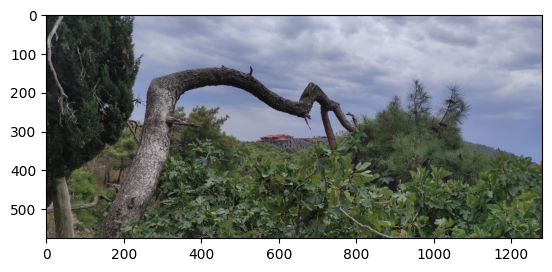

In [40]:
plt.imshow(Image.open('old_house.jpg'))

In [41]:
img = np.array(Image.open('old_house.jpg'))
print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'numpy.ndarray'>
(576, 1280, 3)
uint8
min = 0, max = 243


**Отображение картинки по разным цветовым каналам**

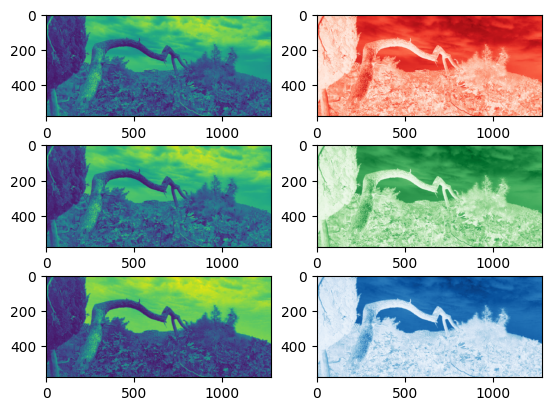

In [42]:
# по умолчанию и с разбивкой по цветам
_, ax = plt.subplots(3,2)

ax[0][0].imshow(img[..., 0])
ax[0][1].imshow(img[..., 0], cmap='Reds')
ax[1][0].imshow(img[..., 1])
ax[1][1].imshow(img[..., 1], cmap='Greens')
ax[2][0].imshow(img[..., 2])
ax[2][1].imshow(img[..., 2], cmap='Blues')

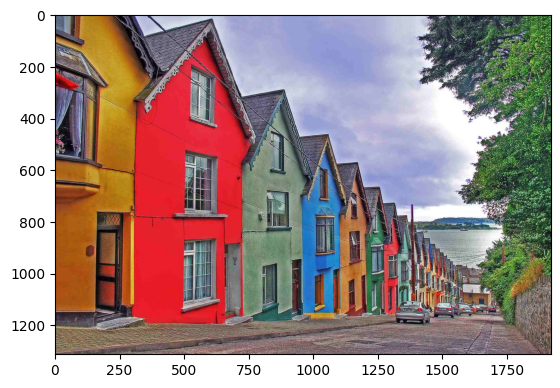

In [43]:
# Картинка с более обширным разбросом цветовой гаммы
plt.imshow(Image.open('colored_houses.jpg'))

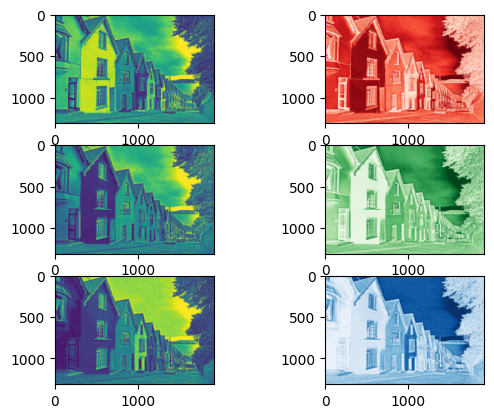

In [44]:
# Картинка с более обширным разбросом цветовой гаммы
img_colored = np.array(Image.open('colored_houses.jpg'))

_, ax = plt.subplots(3,2)

ax[0][0].imshow(img_colored[..., 0])
ax[0][1].imshow(img_colored[..., 0], cmap='Reds')
ax[1][0].imshow(img_colored[..., 1])
ax[1][1].imshow(img_colored[..., 1], cmap='Greens')
ax[2][0].imshow(img_colored[..., 2])
ax[2][1].imshow(img_colored[..., 2], cmap='Blues')

### Преобразования при помощи transforms

In [45]:
# Перевод в тензор для дальнейшей работы с torch

transform = transforms.ToTensor()
img_ToTensor = transform(img) #можно передавать PIL или numpy

print(type(img_ToTensor))
print(img_ToTensor.shape)
print(img_ToTensor.dtype)
print(f'min = {img_ToTensor.min()}, max = {img_ToTensor.max()}')

<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = 0.0, max = 0.9529411792755127


In [46]:
# Нормализация данных

transform = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_norm = transform(img_ToTensor) # нужно передавать тензор

print(type(img_norm))
print(img_norm.shape)
print(img_norm.dtype)
print(f'min = {img_norm.min()}, max = {img_norm.max()}')

<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058823585510254


In [47]:
# Объединение трансформаций

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(Image.open('old_house.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058823585510254


### Преобразования при помощи V2

In [48]:
# Перевод в тензор для дальнейшей работы с torch

transform = v2.ToTensor()
img_ToTensor_v2 = transform(Image.open('old_house.jpg')) #можно передавать PIL или numpy

print(type(img_ToTensor_v2))
print(img_ToTensor_v2.shape)
print(img_ToTensor_v2.dtype)
print(f'min = {img_ToTensor_v2.min()}, max = {img_ToTensor_v2.max()}')

<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = 0.0, max = 0.9529411792755127


C:\Users\metel\.conda\envs\nn_edu\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [49]:
# Перевод в тензор для дальнейшей работы с torch - новая ф-ция

transform = v2.ToImage()
img_v2 = transform(Image.open('old_house.jpg')) #можно передавать PIL или numpy

print(type(img_v2))
print(img_v2.shape)
print(img_v2.dtype)
print(f'min = {img_v2.min()}, max = {img_v2.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 576, 1280])
torch.uint8
min = 0, max = 243


In [50]:
# Изменение типа данных в V2

transform = v2.ToDtype(torch.float32, scale=True) # от scale зависит интервал значений от min до max (0..255 | 0..1)
img_dtype_v2 = transform(img_v2)

print(type(img_dtype_v2))
print(img_dtype_v2.shape)
print(img_dtype_v2.dtype)
print(f'min = {img_dtype_v2.min()}, max = {img_dtype_v2.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 576, 1280])
torch.float32
min = 0.0, max = 0.9529412388801575


In [51]:
# Нормализация данных

transform = v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
img_norm_v2 = transform(img_dtype_v2) # нужно передавать тензор

print(type(img_norm_v2))
print(img_norm_v2.shape)
print(img_norm_v2.dtype)
print(f'min = {img_norm_v2.min()}, max = {img_norm_v2.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058824777603149


In [52]:
# Объединение трансформаций

transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(Image.open('old_house.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058824777603149


## Создание собственного класса преобразований

In [53]:
# общий пример
class MyTransform(torch.nn.Module):

    def forward(self, sample):
        pass

In [54]:
# собственная реализация класса Normalize с наследованием от torch.nn.Module
class MyNormalize_1(torch.nn.Module):

    def __init__(self, mean, std):
        super().__init__()
        self.mean  = mean
        self.std = std

    def forward(self, sample):
        sample = (sample - self.mean)/self.std

        return sample

In [55]:
# собственная реализация класса Normalize без наследования
class MyNormalize_2():

    def __init__(self, mean, std):
        self.mean  = mean
        self.std = std

    def __call__(self, sample):
        sample = (sample - self.mean)/self.std

        return sample

In [56]:
transform_0 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5), std=(0.5))
    ]
)

transform_1 = transforms.Compose(
    [
        transforms.ToTensor(),
        MyNormalize_1(mean=(0.5), std=(0.5))
    ]
)

transform_2 = transforms.Compose(
    [
        transforms.ToTensor(),
        MyNormalize_2(mean=(0.5), std=(0.5))
    ]
)

In [57]:
exmpl_img = Image.open('old_house.jpg')

In [58]:
img_0 = transform_0(exmpl_img)
img_1 = transform_1(exmpl_img)
img_2 = transform_2(exmpl_img)

print(f'\033[94mimg_0:\033[0m')
print(type(img_0))
print(img_0.shape)
print(img_0.dtype)
print(f'min = {img_0.min()}, max = {img_0.max()}')

print(f'\033[94m\nimg_1:\033[0m')
print(type(img_1))
print(img_1.shape)
print(img_1.dtype)
print(f'min = {img_1.min()}, max = {img_1.max()}')

print(f'\033[94m\nimg_2:\033[0m')
print(type(img_2))
print(img_2.shape)
print(img_2.dtype)
print(f'min = {img_2.min()}, max = {img_2.max()}')

img_0:
<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058823585510254

img_1:
<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058823585510254

img_2:
<class 'torch.Tensor'>
torch.Size([3, 576, 1280])
torch.float32
min = -1.0, max = 0.9058823585510254


In [59]:
torch.equal(img_0, img_1)

True

In [60]:
torch.equal(img_0, img_2)

True

## Последовательная модель

### Первый способ создания

In [61]:
# создание модели

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [62]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [63]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32) # 16 - имитируем размер батча

out = model(input)
out.shape

torch.Size([16, 10])

### Методы модели

In [64]:
# Параметры модели, разбитые по слоям

model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0141, -0.0246, -0.0279,  ...,  0.0011,  0.0262, -0.0019],
                      [-0.0008, -0.0072, -0.0135,  ...,  0.0025,  0.0009, -0.0087],
                      [-0.0055,  0.0269,  0.0229,  ...,  0.0263,  0.0087,  0.0233],
                      ...,
                      [ 0.0260,  0.0229, -0.0173,  ..., -0.0238, -0.0028,  0.0305],
                      [ 0.0191, -0.0132,  0.0252,  ..., -0.0166,  0.0013,  0.0038],
                      [-0.0091,  0.0073, -0.0062,  ...,  0.0319, -0.0109,  0.0242]])),
             ('0.bias',
              tensor([-0.0160, -0.0349, -0.0276, -0.0335, -0.0320, -0.0240,  0.0129, -0.0026,
                      -0.0021, -0.0061,  0.0026, -0.0318,  0.0265,  0.0353,  0.0007, -0.0076,
                      -0.0063, -0.0284, -0.0265,  0.0038,  0.0167, -0.0232,  0.0210,  0.0048,
                      -0.0214,  0.0121, -0.0303,  0.0038,  0.0024,  0.0160, -0.0190, -0.0044,
                      -0.0042, -0.0043, 

In [65]:
# Весовые коэффициенты для 1-ого линейного слоя

model.state_dict()['0.weight']

tensor([[-0.0141, -0.0246, -0.0279,  ...,  0.0011,  0.0262, -0.0019],
        [-0.0008, -0.0072, -0.0135,  ...,  0.0025,  0.0009, -0.0087],
        [-0.0055,  0.0269,  0.0229,  ...,  0.0263,  0.0087,  0.0233],
        ...,
        [ 0.0260,  0.0229, -0.0173,  ..., -0.0238, -0.0028,  0.0305],
        [ 0.0191, -0.0132,  0.0252,  ..., -0.0166,  0.0013,  0.0038],
        [-0.0091,  0.0073, -0.0062,  ...,  0.0319, -0.0109,  0.0242]])

In [66]:
# Весовые коэффициенты для баеса 1-ого линейного слоя

model.state_dict()['0.bias']

tensor([-0.0160, -0.0349, -0.0276, -0.0335, -0.0320, -0.0240,  0.0129, -0.0026,
        -0.0021, -0.0061,  0.0026, -0.0318,  0.0265,  0.0353,  0.0007, -0.0076,
        -0.0063, -0.0284, -0.0265,  0.0038,  0.0167, -0.0232,  0.0210,  0.0048,
        -0.0214,  0.0121, -0.0303,  0.0038,  0.0024,  0.0160, -0.0190, -0.0044,
        -0.0042, -0.0043, -0.0309,  0.0287, -0.0256,  0.0202, -0.0078,  0.0300,
        -0.0153, -0.0336,  0.0069,  0.0256,  0.0273, -0.0337, -0.0127, -0.0259,
         0.0121, -0.0046, -0.0216,  0.0121,  0.0158,  0.0114,  0.0220, -0.0319,
        -0.0342,  0.0264,  0.0259, -0.0015, -0.0099, -0.0268, -0.0142,  0.0033,
         0.0327, -0.0259, -0.0013, -0.0150, -0.0224, -0.0079, -0.0326,  0.0310,
         0.0252, -0.0287,  0.0348, -0.0031,  0.0306, -0.0339, -0.0103, -0.0344,
        -0.0353,  0.0058,  0.0250, -0.0212,  0.0312, -0.0034,  0.0042,  0.0113,
         0.0345,  0.0081,  0.0023, -0.0164, -0.0318, -0.0213,  0.0248,  0.0234,
         0.0209, -0.0218,  0.0186,  0.02

In [67]:
# model.parameters() можно и удобно использовать для оптимизатора градиентного спуска

for parameter in model.parameters():
    print(parameter)
    print(parameter.shape, end = '\n\n')

Parameter containing:
tensor([[-0.0141, -0.0246, -0.0279,  ...,  0.0011,  0.0262, -0.0019],
        [-0.0008, -0.0072, -0.0135,  ...,  0.0025,  0.0009, -0.0087],
        [-0.0055,  0.0269,  0.0229,  ...,  0.0263,  0.0087,  0.0233],
        ...,
        [ 0.0260,  0.0229, -0.0173,  ..., -0.0238, -0.0028,  0.0305],
        [ 0.0191, -0.0132,  0.0252,  ..., -0.0166,  0.0013,  0.0038],
        [-0.0091,  0.0073, -0.0062,  ...,  0.0319, -0.0109,  0.0242]],
       requires_grad=True)
torch.Size([128, 784])

Parameter containing:
tensor([-0.0160, -0.0349, -0.0276, -0.0335, -0.0320, -0.0240,  0.0129, -0.0026,
        -0.0021, -0.0061,  0.0026, -0.0318,  0.0265,  0.0353,  0.0007, -0.0076,
        -0.0063, -0.0284, -0.0265,  0.0038,  0.0167, -0.0232,  0.0210,  0.0048,
        -0.0214,  0.0121, -0.0303,  0.0038,  0.0024,  0.0160, -0.0190, -0.0044,
        -0.0042, -0.0043, -0.0309,  0.0287, -0.0256,  0.0202, -0.0078,  0.0300,
        -0.0153, -0.0336,  0.0069,  0.0256,  0.0273, -0.0337, -0.0127, 

In [68]:
# Использовать перед началом обучения модели
model.train()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [69]:
# Использовать перед валидацией и тестированием
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

### Второй способ создания

In [70]:
model_2 = nn.Sequential()
model_2.add_module('layer_1', nn.Linear(784, 128))
model_2.add_module('relu', nn.ReLU())
model_2.add_module('layer_2', nn.Linear(128, 10))

In [71]:
model_2

Sequential(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
)

In [72]:
model_2.layer_1

Linear(in_features=784, out_features=128, bias=True)

In [73]:
model_2.relu

ReLU()

In [74]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32) # 16 - имитируем размер батча

out = model_2(input)
out.shape

torch.Size([16, 10])

In [75]:
# Параметры модели, разбитые по слоям

model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0141, -0.0246, -0.0279,  ...,  0.0011,  0.0262, -0.0019],
                      [-0.0008, -0.0072, -0.0135,  ...,  0.0025,  0.0009, -0.0087],
                      [-0.0055,  0.0269,  0.0229,  ...,  0.0263,  0.0087,  0.0233],
                      ...,
                      [ 0.0260,  0.0229, -0.0173,  ..., -0.0238, -0.0028,  0.0305],
                      [ 0.0191, -0.0132,  0.0252,  ..., -0.0166,  0.0013,  0.0038],
                      [-0.0091,  0.0073, -0.0062,  ...,  0.0319, -0.0109,  0.0242]])),
             ('0.bias',
              tensor([-0.0160, -0.0349, -0.0276, -0.0335, -0.0320, -0.0240,  0.0129, -0.0026,
                      -0.0021, -0.0061,  0.0026, -0.0318,  0.0265,  0.0353,  0.0007, -0.0076,
                      -0.0063, -0.0284, -0.0265,  0.0038,  0.0167, -0.0232,  0.0210,  0.0048,
                      -0.0214,  0.0121, -0.0303,  0.0038,  0.0024,  0.0160, -0.0190, -0.0044,
                      -0.0042, -0.0043, 

## Создание класса для модели нейронной сети

### Модель с одним входом и выходом

In [76]:
class MyModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)

        return out

my_model = MyModel(784, 10).to(device)

In [77]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32).to(device) # 16 - имитируем размер батча

out = my_model(input)
out.shape

torch.Size([16, 10])

### Модель с двумя входами и выходами

In [78]:
class MyModel_2(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x, y):
        x = self.layer_1(x)
        x = self.act(x+y)
        out = self.layer_2(x)

        return out, x

my_model_2 = MyModel_2(784, 10)

In [79]:
# проверка работы модели при помощи рандомного тензора

x = torch.rand([16,784], dtype = torch.float32)
y = torch.rand([16,128], dtype = torch.float32)

out = my_model_2(x, y)

In [80]:
len(out)

2

In [81]:
print(f'out_shape_1 = {out[0].shape}')
print(f'out_shape_2 = {out[1].shape}')

out_shape_1 = torch.Size([16, 10])
out_shape_2 = torch.Size([16, 128])


### Модули ModuleList и ModuleDict

In [82]:
class MyModel_3(nn.Module):
    def __init__(self, input, output, hidden_size=2048, choice='relu'):
        super().__init__()
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'lrelu': nn.LeakyReLU()
        })
        self.layers = nn.ModuleList()
        for i in range(10):
            self.layers.add_module(f'layer_{i}', nn.Linear(input, hidden_size))
            self.layers.add_module(f'act_{i}', self.activations[choice])
            input = hidden_size
            hidden_size = int(hidden_size / 2)
        self.layers.add_module(f'output_{i}', nn.Linear(input, output))
            

    def forward(self, x):
        output = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i != 0 and i%2 == 0 and i%4!= 0:
                output.append(x)
        output.append(x)

        return output

In [83]:
my_model_3 = MyModel_3(784, 2, choice='lrelu')
my_model_3

MyModel_3(
  (activations): ModuleDict(
    (relu): ReLU()
    (lrelu): LeakyReLU(negative_slope=0.01)
  )
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=2048, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=2048, out_features=1024, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Linear(in_features=32, out_features=16, bias=True)
    (15): LeakyReLU(negative_slope=0.01)
    (16): Linear(in_features=16, out_features=8,

In [84]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32)
out = my_model_3(input)

In [85]:
len(out)

6

In [86]:
for i in range(6):
    print(f'out_shape_{i} = {out[i].shape}')

out_shape_0 = torch.Size([16, 1024])
out_shape_1 = torch.Size([16, 256])
out_shape_2 = torch.Size([16, 64])
out_shape_3 = torch.Size([16, 16])
out_shape_4 = torch.Size([16, 4])
out_shape_5 = torch.Size([16, 2])


## Learning Rate Scheduler

In [87]:
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)

### LambdaLR

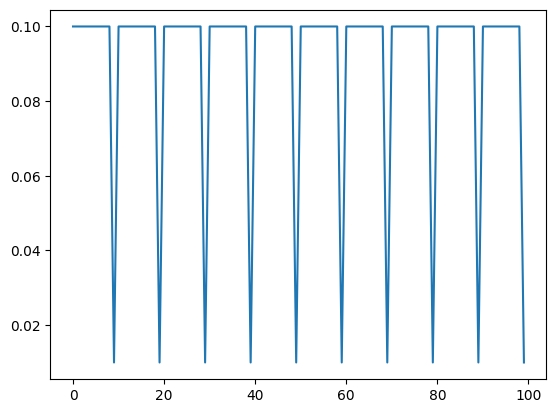

In [88]:
lr_lambda = lambda step: 0.1 if step%10 == 0 else 1 # создали lambda-функцию

# передаем в scheduler opt (создали в ячейке выше) и lambda-функцию lr_lambda
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda=lr_lambda)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### MultiStepLR

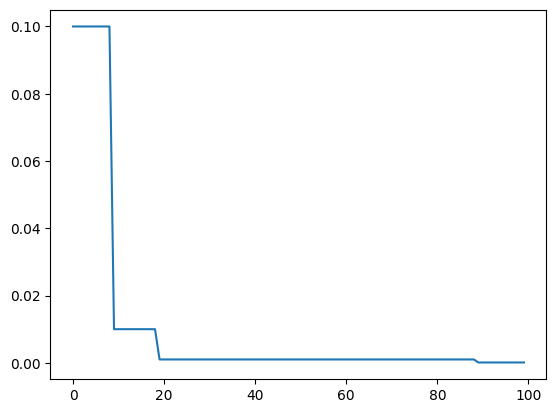

In [89]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)

lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10,20, 90], gamma=0.1)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### StepLR

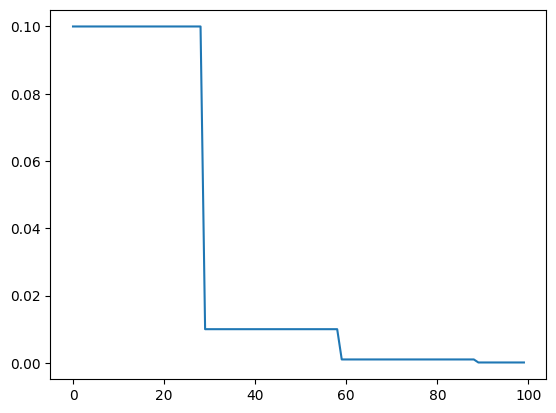

In [90]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### Exponential_LR

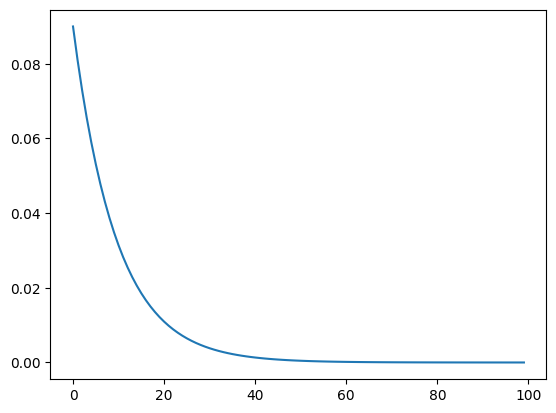

In [91]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

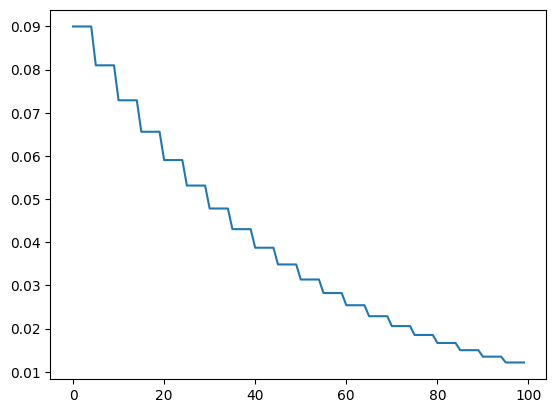

In [92]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # вызываем на каждой 5ой эпохе - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    if epoch % 5 == 0:
        lr_scheduler.step()
    
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### ReduceLROnPlateau

In [93]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                            opt,                  # оптимизатор
                            mode='min',           # 'max' или 'min' - следим, чтобы отслеживаемый параметр уменьшался ('min') или увеличивался ('max')
                            factor=0.1,           # коэффициент, на который будет умножен lr (0.1 = уменьшение в 10 раз)
                            patience=8,          # кол-во эпох без улучшения отслеживаемого параметра
                            threshold=0.0001,     # порог, на который должен измениться отслеживаемый параметр
                            threshold_mode='rel', # 'rel' или 'abs'. Если 'rel', то отслеживаемый параметр должен измениться на threshold процентов, 
                                                  #    если abs - то просто на  threshold
                            cooldown=0,           # кол-во периодов ожидания после уменьшения lr
                            min_lr=0,             # минимальное значение скорости обучения
                            eps=1e-8              # минимальное изменение между новым и старым lr
                        )

In [94]:
# Сымитируем работу функции потерь

loss_LRS = torch.full([5, 10], 0.1)
loss_LRS = loss_LRS * torch.tensor([1/i for i in range(1, 6)]).reshape([5,1])
loss_LRS = loss_LRS.reshape([50])
loss_LRS

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500, 0.0500, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0200, 0.0200, 0.0200, 0.0200, 0.0200,
        0.0200, 0.0200, 0.0200, 0.0200, 0.0200])

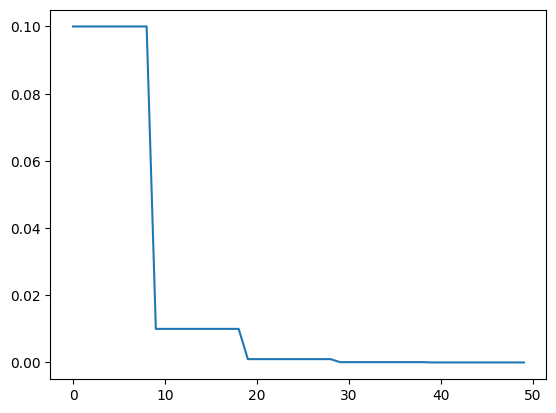

In [95]:
list_LRS = []
for epoch in range(50):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    idx = epoch
    plateau_lr_scheduler.step(loss_LRS[idx])
    
    # получаем новое значение скорости обучения
    lr = plateau_lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_LRS.append(lr)
    
plt.plot(list_LRS)
plt.show()

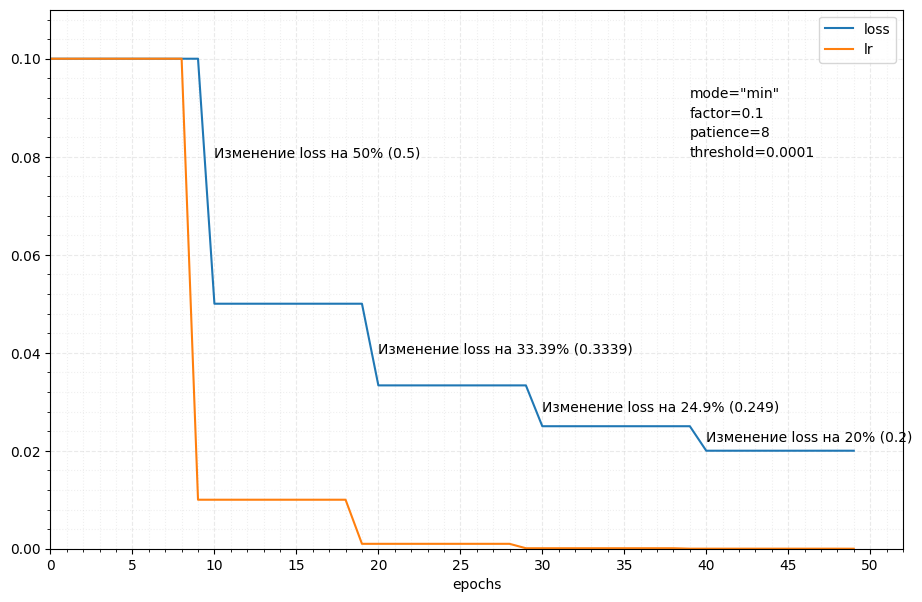

In [96]:
fig, ax = plt.subplots(figsize=(11, 7))

ax.plot(loss_LRS)
ax.plot(list_LRS)

ax.set_xlim(0, 52)
ax.set_ylim(0, 0.11)

ax.xaxis.set_major_locator(MultipleLocator(5))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.4)
ax.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.3)

ax.legend(['loss', 'lr'])
ax.set_xlabel('epochs')

if plateau_lr_scheduler.threshold_mode == "abs":
    ax.text(10, 0.08, 'Изменение loss на 0.05')
    ax.text(20, 0.04, 'Изменение loss на 0.0167')
    ax.text(30, 0.028, 'Изменение loss на 0.008')
    ax.text(40, 0.022, 'Изменение loss на 0.005')
else:
    ax.text(10, 0.08, 'Изменение loss на 50% (0.5)')
    ax.text(20, 0.04, 'Изменение loss на 33.39% (0.3339)')
    ax.text(30, 0.028, 'Изменение loss на 24.9% (0.249)')
    ax.text(40, 0.022, 'Изменение loss на 20% (0.2)')

ax.text(39, 0.092, f'mode="{plateau_lr_scheduler.mode}"')
ax.text(39, 0.088, f'factor={plateau_lr_scheduler.factor}')
ax.text(39, 0.084, f'patience={plateau_lr_scheduler.patience}')
ax.text(39, 0.080, f'threshold={plateau_lr_scheduler.threshold}')

plt.show()

## Сохранение объекта (модели)

In [97]:
dict_1 = {"key_1": torch.tensor([1, 2, 3]), "key_2": torch.tensor([2, 3, 4])}
dict_1

{'key_1': tensor([1, 2, 3]), 'key_2': tensor([2, 3, 4])}

In [98]:
# полное сохранение объекта (можно использовать для модели), но рекомендуется для моделей делать save_dict()

torch.save(dict_1, 'dict_1.pt')

In [99]:
new_dict = torch.load('dict_1.pt')
new_dict

{'key_1': tensor([1, 2, 3]), 'key_2': tensor([2, 3, 4])}